In [1]:
import pandas as pd
import numpy as np
import pyod
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import preprocessing
from pyod.utils.data import evaluate_print

from pyod.models.xgbod import XGBOD

from datetime import datetime

np.set_printoptions(precision=3)

In [2]:
testing_set = pd.read_csv('../Balanced_Samples/Sample_1K.csv',sep=',',header=0)
training_set = pd.read_csv('../Balanced_Samples/Sample_20K.csv',sep=',',header=0)

C:\Users\andre\Anaconda3\envs\security\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#transforma dados categóricos em números
for f in testing_set.columns: 
    if testing_set[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(testing_set[f].values)) 
        testing_set[f] = label.transform(list(testing_set[f].values))
    
testingSet = testing_set.values
np.random.shuffle(testingSet)

testingSet = testingSet.astype(float)

for i in range (1*10**3-1, 0, -1):
    for j in range(0, 84):
        testingSet[i, j] = float(testingSet[i, j])
        if (np.isinf(testingSet[i, j]) or np.isnan(testingSet[i, j])):
            testingSet = np.delete(testingSet, i, axis=0)

y_test = testingSet[:, 84].astype(int)

In [4]:
#transforma dados categóricos em números
for f in training_set.columns: 
    if training_set[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(training_set[f].values)) 
        training_set[f] = label.transform(list(training_set[f].values))
    
trainingSet = training_set.values
np.random.shuffle(trainingSet)

trainingSet = trainingSet.astype(float)

for i in range (2*10**4-1, 0, -1):
    for j in range(0, 84):
        trainingSet[i, j] = float(trainingSet[i, j])
        if (np.isinf(trainingSet[i, j]) or np.isnan(trainingSet[i, j])):
            trainingSet = np.delete(trainingSet, i, axis=0)

y_train = trainingSet[:, 84].astype(int)

In [5]:
outliers_fraction = 0.5
def testMethod(clf, clf_name):
    print("Started fitting: ", datetime.now(), "\n")
    clf.fit(trainingSet, y_train)
    print("Endend fitting: ", datetime.now(), "\n")

    #####################################################################
    
    print("Started predicting: ", datetime.now(), "\n")
    y_test_pred = clf.predict(testingSet)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(testingSet)  # outlier scores
    print("Ended predicting: ", datetime.now(), "\n")
    
    #####################################################################

    print("\nOn Test Data - "+clf_name+":")
    truePositive = 0
    trueNegative = 0
    falsePositive = 0
    falseNegative = 0

    for i in range(y_test.size):
        if(y_test[i] == 1 and y_test_pred[i] == 1):
            truePositive = truePositive+1
        elif (y_test[i] == 0 and y_test_pred[i] == 0):
            trueNegative = trueNegative+1
        elif (y_test[i] == 0 and y_test_pred[i] == 1):
            falsePositive = falsePositive+1
        else:
            falseNegative = falseNegative+1

    print(truePositive, " | ", falsePositive)
    print(falseNegative, " | ", trueNegative,"\n")

    evaluate_print(clf_name, y_test, y_test_scores)

    #####################################################################

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_scores)
    roc_auc = metrics.auc(fpr, tpr)

    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic - '+clf_name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Started fitting:  2019-10-13 16:32:26.108439 

Fitting estimator 1 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-13 16:32:26.250350


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\pyod\models\base.py:344: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


End:  2019-10-13 16:32:41.114190 

Fitting estimator 2 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-13 16:32:41.125183
End:  2019-10-13 16:32:58.102722 

Fitting estimator 3 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=1, p=2)
Start:  2019-10-13 16:32:58.105720
End:  2019-10-13 16:33:13.369317 

Fitting estimator 4 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2,
  radius=1.0)
Start:  2019-10-13 16:33:13.372316
End:  2019-10-13 16:33:33.534889 

Fitting estimator 5 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params

End:  2019-10-13 16:48:26.174304 

Fitting estimator 33 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=80, p=2)
Start:  2019-10-13 16:48:26.182354
End:  2019-10-13 16:48:59.159500 

Fitting estimator 34 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=90, p=2,
  radius=1.0)
Start:  2019-10-13 16:48:59.159500
End:  2019-10-13 16:49:35.573377 

Fitting estimator 35 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=90, p=2,
  radius=1.0)
Start:  2019-10-13 16:49:35.573377
End:  2019-10-13 16:50:13.021342 

Fitting estimator 36 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n

C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:06:23.295094 

Fitting estimator 62 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=20, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:06:23.310716


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:06:25.049634 

Fitting estimator 63 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=50, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:06:25.049634


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:06:29.170773 

Fitting estimator 64 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=70, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:06:29.170773


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:06:34.782362 

Fitting estimator 65 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:06:34.797984


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:06:43.091995 

Fitting estimator 66 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=150, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:06:43.091995


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:06:55.401231 

Fitting estimator 67 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=200, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:06:55.401231


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:07:11.801765 

Fitting estimator 68 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=250, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:07:11.801765


C:\Users\andre\Anaconda3\envs\security\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


End:  2019-10-13 17:07:31.862464 

Fitting XGBoost: 
Start:  2019-10-13 17:07:31.893713
End:  2019-10-13 17:07:49.908951 

Endend fitting:  2019-10-13 17:07:50.248531 

Started predicting:  2019-10-13 17:07:50.248531 


Generating new features for prediction: 

Predicting estimator 1 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-13 17:07:50.248531
End:  2019-10-13 17:07:54.064155 

Predicting estimator 2 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0)
Start:  2019-10-13 17:07:54.079779
End:  2019-10-13 17:07:57.820459 

Predicting estimator 3 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors

End:  2019-10-13 17:09:44.047242 

Predicting estimator 31 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=80, p=2,
  radius=1.0)
Start:  2019-10-13 17:09:44.047242
End:  2019-10-13 17:09:48.204835 

Predicting estimator 32 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=80, p=2,
  radius=1.0)
Start:  2019-10-13 17:09:48.204835
End:  2019-10-13 17:09:52.612500 

Predicting estimator 33 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=80, p=2)
Start:  2019-10-13 17:09:52.612500
End:  2019-10-13 17:09:56.244329 

Predicting estimator 34 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='min

End:  2019-10-13 17:10:35.083607 

Predicting estimator 65 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:10:35.083607
End:  2019-10-13 17:10:35.227584 

Predicting estimator 66 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=150, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:10:35.227584
End:  2019-10-13 17:10:35.425263 

Predicting estimator 67 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=200, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:10:35.425263
End:  2019-10-13 17:10:35.688038 

Predicting estimator 68 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False,

End:  2019-10-13 17:12:13.050033 

Predicting estimator 27 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=60, p=2)
Start:  2019-10-13 17:12:13.050033
End:  2019-10-13 17:12:16.799108 

Predicting estimator 28 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=70, p=2,
  radius=1.0)
Start:  2019-10-13 17:12:16.799108
End:  2019-10-13 17:12:20.924017 

Predicting estimator 29 of 68 (standarlization: true):
 KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=70, p=2,
  radius=1.0)
Start:  2019-10-13 17:12:20.939638
End:  2019-10-13 17:12:25.087365 

Predicting estimator 30 of 68 (standarlization: true):
 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_pa

End:  2019-10-13 17:13:16.806941 

Predicting estimator 60 of 68 (standarlization: true):
 OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.99, shrinking=True, tol=0.001,
   verbose=False)
Start:  2019-10-13 17:13:16.806941
End:  2019-10-13 17:13:19.354152 

Predicting estimator 61 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=10, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:13:19.369771
End:  2019-10-13 17:13:19.385395 

Predicting estimator 62 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=20, n_jobs=1, random_state=0,
    verbose=0)
Start:  2019-10-13 17:13:19.385395
End:  2019-10-13 17:13:19.432273 

Predicting estimator 63 of 68 (standarlization: false):
 IForest(behaviour='old', bootstrap=False, cont

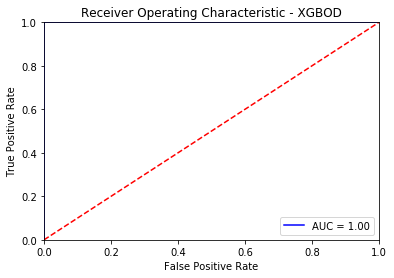

In [6]:
testMethod(XGBOD(contamination= outliers_fraction), "XGBOD")

In [7]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree

In [9]:
model_name = 'XGBOOST'
model = XGBClassifier()
model.fit(trainingSet, y_train) # matriz(sem label de respostas), vetor(label com respostas de treino)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


On Test Data - XGBOOST:

              CONFUSION MATRIX

                  Actual

Predicted      543  |  0
               0  |  452 



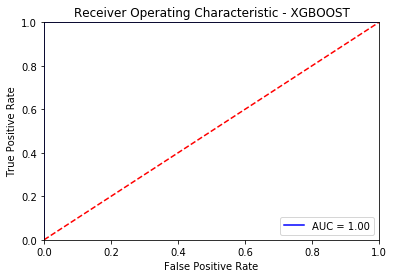

In [11]:
y_pred = model.predict(testingSet)
predictions = [round(value) for value in y_pred]

print("\nOn Test Data - "+model_name+":")
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

for i in range(y_test.size):
    if(y_test[i] == 1 and y_pred[i] == 1):
        truePositive = truePositive+1
    elif (y_test[i] == 0 and y_pred[i] == 0):
        trueNegative = trueNegative+1
    elif (y_test[i] == 0 and y_pred[i] == 1):
        falsePositive = falsePositive+1
    else:
        falseNegative = falseNegative+1
print()
print("              CONFUSION MATRIX")
print()
print("                  Actual")
print()
print("Predicted     ", truePositive, " | ", falsePositive)
print("              ",falseNegative, " | ", trueNegative,"\n")

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
    
plt.title('Receiver Operating Characteristic - '+model_name)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()